<font size="6"><strong><center>IBM Employee Attrition Prediction </center></strong></font> 

<br>
<center><span style="font-family: Arial;font-size:1.2em">Rochelle Liu</center>
<center><span style="font-family: Arial;font-size:1.2em">04-2022</center>

- Exploratory data analysis

 - Find the age distribution of employees in IBM
 - Explore attrition by age
 - Explore data for Left employees
 - Find out the distribution of employees by the education field
 - Give a bar chart for the number of married and unmarried employees
 
- Build up a logistic regression model to predict which employees are likely to attrite.



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from patsy import dmatrices
import sklearn
import tensorflow as tf

In [44]:
df = pd.read_csv("IBM Attrition Data.csv")

In [45]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [46]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

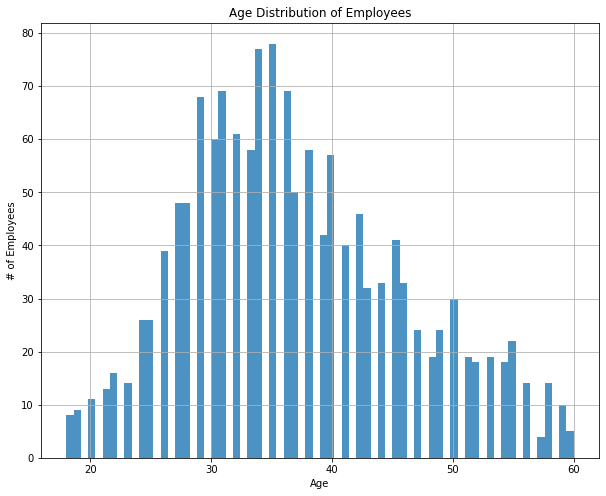

In [47]:
#histogram for age
plt.figure(figsize=(10,8))
df['Age'].hist(bins=70, alpha=.8)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("# of Employees")
plt.show()

/Users/Rochelle_1/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


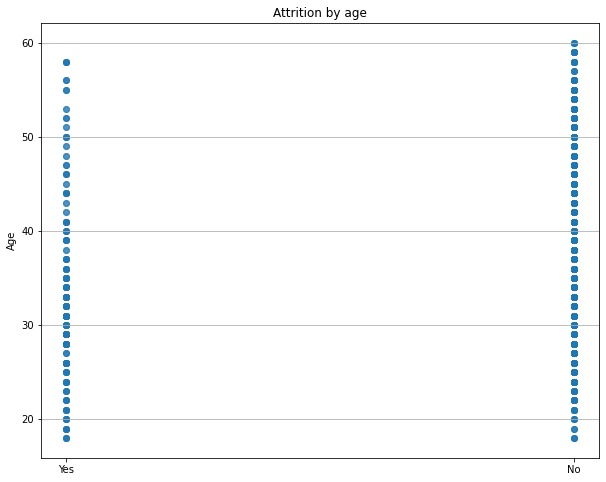

In [48]:
#explore data for attrition by Age
plt.figure(figsize=(10,8))
plt.scatter(df.Attrition, df.Age, alpha=.55)
plt.title("Attrition by age")
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y')
plt.show()

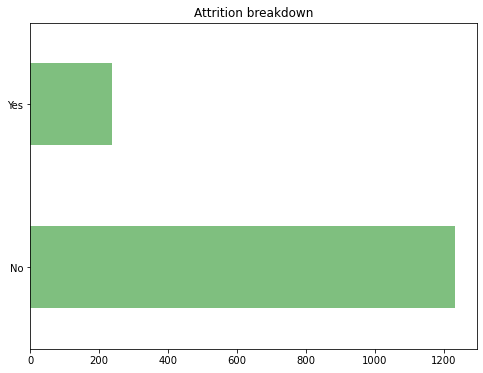

In [49]:
#explore data for Left employees
plt.figure(figsize=(8,6))
df.Attrition.value_counts().plot(kind='barh', color='g',alpha=.5)
plt.title("Attrition breakdown")
plt.show()

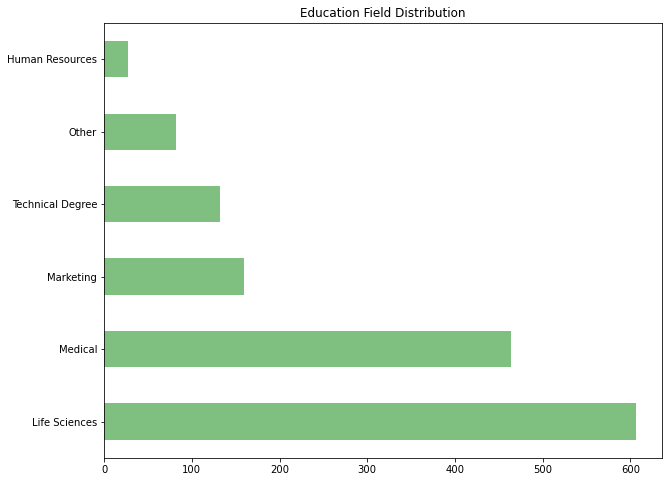

In [50]:
#explore data for Education Field distribution
plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot(kind='barh',color='g',alpha=.5)
plt.title("Education Field Distribution")
plt.show()

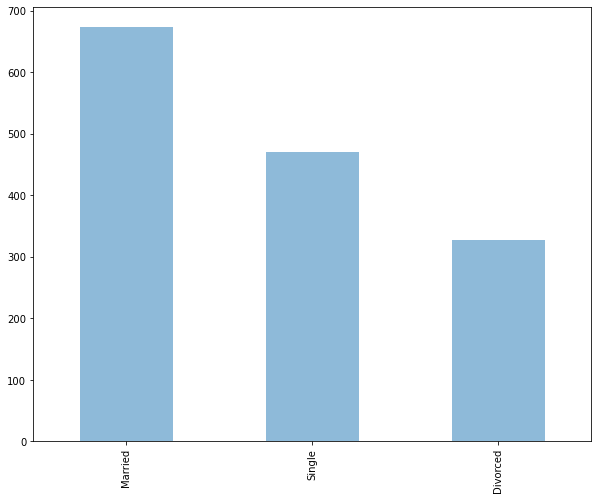

In [51]:
#explore data for marital status
plt.figure(figsize=(10,8))
df.MaritalStatus.value_counts().plot(kind='bar', alpha =.5)
plt.show()

## Logistic Regression Model
                ———— predict which employees are likely to attrite

In [52]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [54]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [55]:
#replace "Yes"/"No" by 0/1
df["Attrition"].replace('Yes',1, inplace= True)
df["Attrition"].replace('No',0, inplace= True)

In [56]:
df.head(10)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
5,32,0,Research & Development,2,2,Life Sciences,4,4,Single,3068,0,2,7
6,59,0,Research & Development,3,3,Medical,3,1,Married,2670,4,2,1
7,30,0,Research & Development,24,1,Life Sciences,4,3,Divorced,2693,1,3,1
8,38,0,Research & Development,23,3,Life Sciences,4,3,Single,9526,0,3,9
9,36,0,Research & Development,27,3,Medical,3,3,Married,5237,6,2,7


In [57]:
#building up a logistic regression model
X = df.drop(['Attrition'], axis=1)
Y = df['Attrition']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [58]:
df['EducationField'].replace('Life Sciences',1, inplace=True)
df['EducationField'].replace('Medical',2, inplace=True)
df['EducationField'].replace('Marketing', 3, inplace=True)
df['EducationField'].replace('Other',4, inplace=True)
df['EducationField'].replace('Technical Degree',5, inplace=True)
df['EducationField'].replace('Human Resources', 6, inplace=True)

In [59]:
df['EducationField'].value_counts()

1    606
2    464
3    159
5    132
4     82
6     27
Name: EducationField, dtype: int64

In [60]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [61]:
df['Department'].replace('Research & Development',1,inplace=True)
df['Department'].replace('Sales',2,inplace=True)
df['Department'].replace('Human Resources',3,inplace=True)

In [62]:
df['Department'].value_counts()

1    961
2    446
3     63
Name: Department, dtype: int64

In [63]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [64]:
df['MaritalStatus'].replace('Married',1,inplace=True)
df['MaritalStatus'].replace('Single',2,inplace=True)
df['MaritalStatus'].replace('Divorced',3,inplace=True)

In [65]:
df['MaritalStatus'].value_counts()

1    673
2    470
3    327
Name: MaritalStatus, dtype: int64

In [66]:
x=df.select_dtypes(include=['int64'])
x.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

In [80]:
y= Y
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [82]:
y, x = dmatrices('Attrition ~ Age + Department + \
                  DistanceFromHome + Education + EducationField + YearsAtCompany',
                  df, return_type="dataframe")
print (x.columns)

Index(['Intercept', 'Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'YearsAtCompany'],
      dtype='object')


In [83]:
y = np.ravel(y)

In [84]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(x, y)

#check the accuracy on the training set
model.score(x, y)

0.8408163265306122

In [85]:
y.mean()

0.16122448979591836

In [89]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [91]:
predicted = model2.predict(X_test)

In [93]:
probs = model2.predict_proba(X_test)
probs

array([[0.86179618, 0.13820382],
       [0.80754591, 0.19245409],
       [0.74123919, 0.25876081],
       [0.83441341, 0.16558659],
       [0.73499931, 0.26500069],
       [0.79097736, 0.20902264],
       [0.85615193, 0.14384807],
       [0.85699667, 0.14300333],
       [0.9669906 , 0.0330094 ],
       [0.93685214, 0.06314786],
       [0.95099283, 0.04900717],
       [0.8310155 , 0.1689845 ],
       [0.86296559, 0.13703441],
       [0.86581194, 0.13418806],
       [0.88750608, 0.11249392],
       [0.88892616, 0.11107384],
       [0.88569731, 0.11430269],
       [0.7851658 , 0.2148342 ],
       [0.7979449 , 0.2020551 ],
       [0.88511309, 0.11488691],
       [0.70651577, 0.29348423],
       [0.94676697, 0.05323303],
       [0.86736253, 0.13263747],
       [0.84276449, 0.15723551],
       [0.60336815, 0.39663185],
       [0.81129199, 0.18870801],
       [0.91813735, 0.08186265],
       [0.93285524, 0.06714476],
       [0.68230736, 0.31769264],
       [0.87027143, 0.12972857],
       [0.

In [95]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,predicted))
print(metrics.roc_auc_score(y_test,probs[:,1]))

0.8435374149659864
0.6502502887947632


In [97]:
print(metrics.confusion_matrix(y_test,predicted))

[[371   0]
 [ 69   1]]


In [98]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.47       441
weighted avg       0.87      0.84      0.77       441



In [99]:
#add random values to KK according to the parameters mentioned above to check the proabily of attrition of the employee
kk=[[1.0, 23.0, 1.0, 500.0, 3.0, 24.0, 1.0]]
print(model.predict_proba(kk))

[[6.25571974e-07 9.99999374e-01]]


/Users/Rochelle_1/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
